C:\Users\mryad\AppData\Local\Temp\ipykernel_32256\944340219.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\mryad\AppData\Local\Temp\ipykernel_32256\944340219.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_conditions.index, y=road_conditions.values, palette='viridis')
C:\Users\mryad\AppData\Local\Temp\ipykernel_32256\944340219.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_conditions.index, y=weather_conditions.values, palette='viridis')
C:\Users\mryad\AppData\Local\Temp\ipykernel_32256\944340219.py:61: FutureWarning:

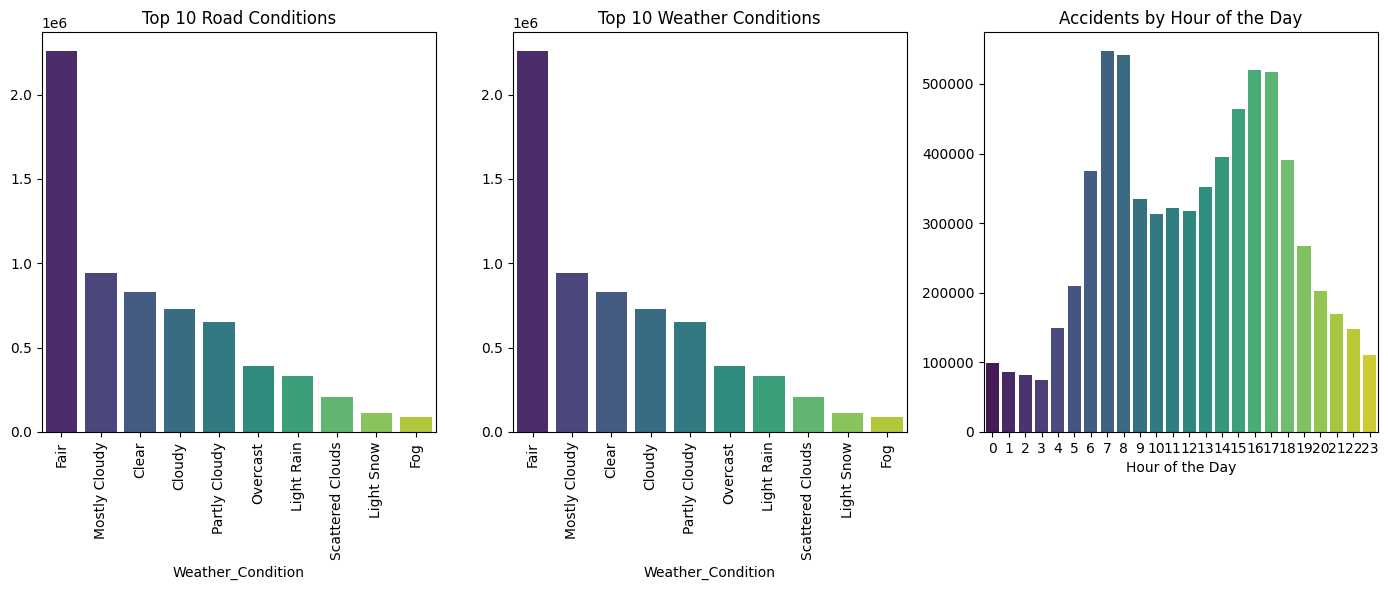

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
url = "C:\\Users\\mryad\\Downloads\\archive\\US_Accidents_March23.csv"
df = pd.read_csv(url)


# Preprocess the data
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# Drop rows with invalid dates
df = df.dropna(subset=['Start_Time'])

# Extract hour, day of the week, and month from Start_Time
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Analyze patterns related to road conditions, weather, and time of day
road_conditions = df['Weather_Condition'].value_counts().head(10)
weather_conditions = df['Weather_Condition'].value_counts().head(10)
time_of_day = df['Hour'].value_counts().sort_index()

# Visualize accident hotspots using Folium
# Create a map centered at the mean latitude and longitude
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add a heatmap to the map
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map to an HTML file
accident_map.save('accident_hotspots.html')

# Visualize contributing factors
plt.figure(figsize=(14, 6))

# Plot road conditions
plt.subplot(1, 3, 1)
sns.barplot(x=road_conditions.index, y=road_conditions.values, palette='viridis')
plt.title('Top 10 Road Conditions')
plt.xticks(rotation=90)

# Plot weather conditions
plt.subplot(1, 3, 2)
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, palette='viridis')
plt.title('Top 10 Weather Conditions')
plt.xticks(rotation=90)

# Plot time of day
plt.subplot(1, 3, 3)
sns.barplot(x=time_of_day.index, y=time_of_day.values, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')

plt.tight_layout()
plt.show()
